In [16]:
import numpy as np
import urllib.request, json 
import pandas as pd
import matplotlib.pyplot as plt

#1.  sma algorithme
def sma_algo(data,window):
    weights=np.repeat(1.0,window)
    sma=np.convolve(data,weights/window,'valid')
    return(sma)

In [17]:
#2 Import data
with urllib.request.urlopen("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo)") as url:
    data = json.loads(url.read().decode())
    

In [18]:
#3 Calculate Average Price

def average_price(date):

    high=data['Time Series (Daily)'][date]['2. high']
    low=data['Time Series (Daily)'][date]['3. low']
    average_price=(float(high)+float(low))/2
    print(average_price)

In [19]:
#4 Calculate SMA values of 5 day  based on daily average prices
 
data=data['Time Series (Daily)']
df = pd.DataFrame(data).T

#rename columns
df = df.rename(columns={'2. high':'Hight','3. low':'Low'})

#change data type
df['Hight']=df['Hight'].astype(float)
df['Low']=df['Low'].astype(float)
df['Averge Price']=(df['Hight'] + df['Low'])/2

#Calculate SMA values
sma=sma_algo(df['Averge Price'],5)
sma = pd.DataFrame(sma)



In [20]:

#5 Calculate the profit

#Extract date
date=pd.DataFrame(df.index)
date=date.drop(axis=1,index=[0,1,2,3])
date.index = np.arange(len(date.index))


In [21]:
#create new dataframe with sma values and the date
df1= pd.concat([date,sma], axis=1,ignore_index=True).transpose()
df1= df1.T.set_index(0)[1].rename('sma').astype(float)



In [24]:
#add the new dataframe to the previous one
df['SMA']=df1
df.head(7)


,1. open,Hight,Low,4. close,5. volume,Averge Price,SMA
2018-12-03,113.0000,113.4200,110.73,112.0900,34275048,112.07500,NaN
2018-11-30,110.7000,110.9700,109.36,110.8900,33665624,110.16500,NaN
2018-11-29,110.3300,111.1150,109.03,110.1900,28123195,110.07250,NaN
2018-11-28,107.8900,111.3300,107.86,111.1200,46788461,109.59500,NaN
2018-11-27,106.2700,107.3300,105.36,107.1400,29124486,106.34500,109.65050
2018-11-26,104.7900,106.6300,104.58,106.4700,32336165,105.60500,108.35650
2018-11-23,102.1700,103.8099,102.00,103.0700,13823099,102.90495,106.90449


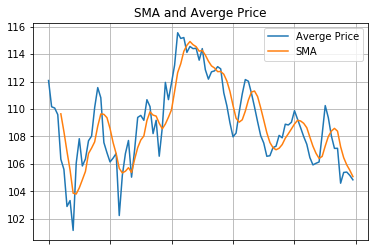

In [25]:
#visualize data
df[['Averge Price','SMA']].plot(grid=True)
plt.title('SMA and Averge Price')
plt.show()

In [26]:
#Calculate the profit
buy_actions= df.loc[df['SMA'] < df['Averge Price'],'Averge Price'].sum()
sell_action= df.loc[df['SMA'] > df['Averge Price'],'SMA'].sum()
profit=sell_action-buy_actions
print("User's profit :",profit)

User's profit : 631.8440100000007
